In [35]:
include(joinpath(@__DIR__, "../src/main.jl")) 
include("EAX.jl")
include("mEAX.jl")
include("Draw.jl")
using XLSX
using OffsetArrays

function Write_to_excel(row::Int, col::Int, obj::Float64)
    sheetnumber = 2
    cols = ["B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
    XLSX.openxlsx("He_Results.xlsx", mode="rw") do xf
        sheet = xf[sheetnumber]
        sheet[cols[col]*string(row)] = obj
    end
end

# instances = [:berlin52]
# Ms = [2]
# test(instances, Ms)

# dir_name = "set1"
# sample_names = ["mtsp150_3", "mtsp150_5", "mtsp150_10", "kroa200_3", "kroa200_5","kroa200_10", "lin318_3", "lin318_5", "lin318_10"]

# Solve_instances(dir_name, sample_names)


dir_name = "set1"
sample_names = ["mtsp150_5"]
# ["mtsp51_3", "mtsp51_5", "mtsp51_10", "mtsp100_3", "mtsp100_5", "mtsp100_10", "mtsp100_20", "mtsp150_3", "mtsp150_5", "mtsp150_10",
#      "mtsp150_20", "mtsp150_30", "gtsp150_3", "gtsp150_5", "gtsp150_10", "gtsp150_20", 
#     "gtsp150_30", "kroa200_3", "kroa200_5","kroa200_10","kroa200_20", "lin318_3", "lin318_5", "lin318_10", "lin318_20"]

best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
all_chrms = Chromosome[]

row = 0
for sample_name in sample_names
    row += 1
    println(sample_name)
    m, T, depot_, customers = read_data(dir_name, sample_name)
    Customers = copy(transpose(customers))
    depot = Float64.(depot_)
    n = size(T)[1]-2
    demands = ones(Int, n)
    W = 1000
    h = 0.3
    popsize = (10,20)
    k_tournament = 2
    num_iter = 1000000
    time_limit = (n+1)/5 #*240/100
    Mutation_Chance = 0.0
    num_runs = 10
    num_nei = 1
    avg = 0.0
    best = Inf
    worst = 0.0
    crossover_functions = [2]

    t1 = time()
    for i=1:num_runs
        P, roullet = Perform_Genetic_Algorithm(T, m, h, popsize, 
                    k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, Customers, depot);
    #             roullet_ = roullet_ + roullet
#         Write_to_excel(row, i, P[1].fitness)
        avg += P[1].fitness
        push!(all_chrms, P[1])
        if P[1].fitness < best
            best = P[1].fitness
            best_chrm = P[1]
        end
        if P[1].fitness > worst
            worst = P[1].fitness
            worst_chrm = P[1]
        end
    end
    t2 = time()
    println("Results for ", sample_name, " ,m=", m)
    println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
        "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=0))
end

mtsp150_5
Generation 0 the best objective is: 10282.714901922138   time left: 29.0 seconds
Generation 1000 the best objective is: 8677.346216105043   time left: 22.0 seconds
Generation 2000 the best objective is: 8591.387787419211   time left: 15.0 seconds
Generation 3000 the best objective is: 8527.287044940642   time left: 9.0 seconds
Generation 4000 the best objective is: 8527.287044940642   time left: 3.0 seconds
The best objective achieved in 4552 generations is: 8527.287044940638 and it took 30.003000020980835 seconds.
Generation 0 the best objective is: 10152.168593515209   time left: 29.0 seconds
Generation 1000 the best objective is: 8548.838358792469   time left: 23.0 seconds
Generation 2000 the best objective is: 8548.838358792469   time left: 17.0 seconds
Generation 3000 the best objective is: 8548.838358792469   time left: 11.0 seconds
Generation 4000 the best objective is: 8548.838358792469   time left: 5.0 seconds
The best objective achieved in 4834 generations is: 8548.

LoadError: InterruptException:

Tour 1:5430.285646878687
Tour 2:5398.521348782694
Tour 3:5327.587257280907
Tour 4:4999.5371433501905
Tour 5:5336.933786424065
Tour 6:5324.31883065731
Tour 7:4752.72807430088
Tour 8:5415.099760439338
Tour 9:5307.062904394897
Tour 10:5224.282277441844


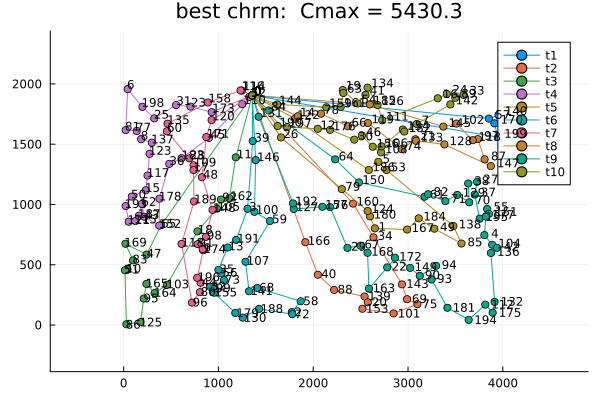

In [42]:
dir_name = "set1"
sample_name = "kroA200_10" 
m, T, depot_, customers = read_data(dir_name, sample_name)
Customers = copy(transpose(customers))
depot = Float64.(depot_)
Draw_Solution(best_chrm, depot, Customers, "best chrm: ", best_chrm.fitness)

In [43]:
depot

2-element Vector{Float64}:
 1357.0
 1905.0

Tour 1:8505.205332414915
Tour 2:8638.25031776813
Tour 3:8642.582154254334
Tour 4:8569.14114880772
Tour 5:8622.242125938697


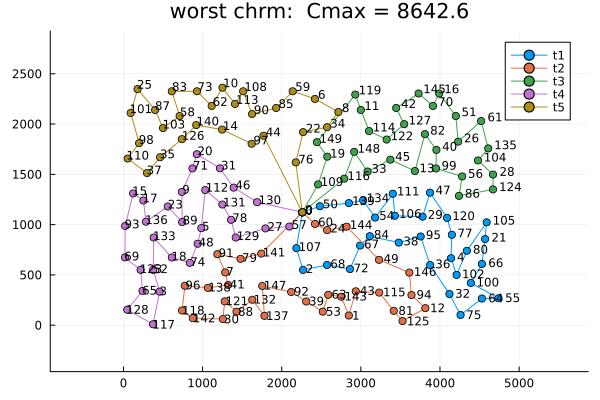

In [20]:
Draw_Solution(worst_chrm, depot, Customers, "worst chrm: ", worst_chrm.fitness)

In [16]:
Random.seed!(time())

LoadError: MethodError: no method matching seed!(::Float64)
[0mClosest candidates are:
[0m  seed!() at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Random\src\RNGs.jl:362
[0m  seed!([91m::RandomDevice[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Random\src\RNGs.jl:70
[0m  seed!([91m::MersenneTwister[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Random\src\RNGs.jl:362
[0m  ...

In [26]:
length(b)

26

In [ ]:
include(joinpath(@__DIR__, "../src/main.jl")) 
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
row = 25
for sample_name in [:pcb1173]
    T, depot, Customers = Calculate_TSPLIB(sample_name)
    for m in [3, 5 , 10, 20]
        row += 1
        println(sample_name,"_", m)
        all_chrms = Chromosome[]    
        n = size(T)[1]-2
        demands = ones(Int, n)
        W = 10000
        h = 0.3
        popsize = (10,20)
        k_tournament = 2
        num_iter = 10000
        time_limit = (n+1)/5
        Mutation_Chance = 0.0
        num_runs = 1
        num_nei = 1
        avg = 0.0
        best = Inf
        worst = 0.0
        crossover_functions = [2]

        t1 = time()
        for i=1:num_runs
            P, roullet = Perform_Genetic_Algorithm(T,m, h, popsize, 
                k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, Customers, depot);
#             Write_to_excel(row, i, P[1].fitness)
            avg += P[1].fitness
            push!(all_chrms, P[1])
            if P[1].fitness < best
                best = P[1].fitness
                best_chrm = P[1]
            end
            if P[1].fitness > worst
                worst = P[1].fitness
                worst_chrm = P[1]
            end
        end
        t2 = time()
        println("Results for ", sample_name, " ,m=", m)
        println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
            "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=0))
    end
end

pcb1173_3
Generation 0 the best objective is: 22134.171362117868   time left: 189.0 seconds
Generation 10 the best objective is: 21734.92004305021   time left: 181.0 seconds
Generation 20 the best objective is: 21734.92004305021   time left: 178.0 seconds
Generation 30 the best objective is: 21734.92004305021   time left: 172.0 seconds
Generation 40 the best objective is: 21734.92004305021   time left: 166.0 seconds
Generation 50 the best objective is: 21141.828164624894   time left: 160.0 seconds
Generation 60 the best objective is: 21141.828164624894   time left: 154.0 seconds
Generation 70 the best objective is: 21040.41606017852   time left: 152.0 seconds
Generation 80 the best objective is: 21040.41606017852   time left: 149.0 seconds
Generation 90 the best objective is: 21040.41606017852   time left: 145.0 seconds
Generation 100 the best objective is: 21040.41606017852   time left: 144.0 seconds
Generation 110 the best objective is: 21035.989040566485   time left: 141.0 seconds
G

In [19]:
T, depot, Customers = Calculate_TSPLIB(:rat783)
m = 3
n_nodes = size(T)[1]-2

782

In [17]:
t = deepcopy(best_chrm.tours[1])

Tour([14, 55, 87, 96, 109, 116, 122, 159, 174, 195  …  231, 197, 151, 119, 110, 106, 80, 66, 44, 36], 3354.8840276940455)

rearange_nodes (generic function with 1 method)

In [86]:
c = deepcopy(best_chrm)

Chromosome([87, 124, 145, 171, 179, 185, 184, 214, 234, 241  …  115, 97, 75, 62, 57, 46, 6, 1, 22, 16], 3429.171425237308, 0.0, Tour[Tour([87, 124, 145, 171, 179, 185, 184, 214, 234, 241  …  155, 152, 126, 114, 96, 56, 44, 45, 40, 36], 3420.4378888219862), Tour([17, 11, 8, 9, 2, 4, 18, 29, 7, 19  …  82, 93, 110, 106, 80, 99, 79, 69, 66, 24], 3429.171425237308), Tour([14, 55, 48, 51, 109, 116, 122, 138, 146, 154  …  115, 97, 75, 62, 57, 46, 6, 1, 22, 16], 3429.0813946611866)])

In [87]:
c1 = deepcopy(c.tours)
deleted_nodes = Int[]
for tour in c1
    dlt_idx = Int[]
    for (i, node) in enumerate(tour.Sequence)
        if rand() < 0.1
            push!(dlt_idx, i)
        end
    end
    println(dlt_idx)
    deleted_nodes = vcat(deleted_nodes, dlt_idx)
    Remove_cities_from_one_tour(tour, dlt_idx, T, n_nodes)
    deleteat!(tour.Sequence, dlt_idx)
end

[15, 16, 45, 51, 55, 63, 65, 67, 68, 74, 114, 138, 140, 153, 175, 190, 198, 236, 237, 245, 255]
[21, 50, 69, 82, 99, 102, 104, 111, 136, 156, 160, 166, 217, 249, 263, 270]
[6, 8, 15, 21, 23, 27, 29, 65, 68, 69, 93, 96, 98, 104, 111, 127, 128, 146, 148, 160, 166, 167, 175, 190, 203, 213, 214, 218, 223, 253]


In [90]:
summ = 0
for tour in c1
    println(tour.cost, "   ", find_tour_length(tour.Sequence, T))
    summ += length(tour.Sequence)
end
        

3337.849657135495   3337.8496571354954
3398.5138893534827   3398.5138893534813
3327.502689644062   3327.5026896440622


In [91]:
summ

715

In [92]:
deleted_nodes

67-element Vector{Int64}:
  15
  16
  45
  51
  55
  63
  65
  67
  68
  74
 114
 138
 140
   ⋮
 148
 160
 166
 167
 175
 190
 203
 213
 214
 218
 223
 253

In [55]:
@time begin
    length(intersect(a,b))
end

  0.000027 seconds (19 allocations: 6.547 KiB)

11

In [60]:
@time begin 
#     set_a = Set(a)
#     set_b = Set(b)
    length(intersect(Set(a), Set(b)))
end

  0.000020 seconds (24 allocations: 6.969 KiB)

11